<a href="https://colab.research.google.com/github/harnalashok/timeseries/blob/main/ADF_test_and_ACF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 27th Feb, 2023
# Ref: https://github.com/marcopeix/TimeSeriesForecastingInPython/blob/master/CH04/CH04.ipynb
#      https://github.com/marcopeix/TimeSeriesForecastingInPython/blob/master/CH03/CH03.ipynb
#      https://koalatea.io/python-stationary-check/

# Other references:
#  https://analyticsindiamag.com/general-overview-of-time-series-data-analysis/
#  https://analyticsindiamag.com/a-guide-to-varma-with-auto-arima-in-time-series-modelling/
#  https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/

In [ ]:
# Objective(s)
#             To test is a timeseries (or residuals)
#             are stationary through two tests:
#             adfuller and acorr_ljungbox

## About statsmodel
Complete strature of statsmodel.tsa is given at [this link](https://www.statsmodels.org/dev/tsa.html). You can have a look at the graphics module [here](https://www.statsmodels.org/dev/graphics.html)

`statsmodels.tsa.seasonal.STL` is commonly used to remove seasonal components from a time series. The deseasonalized time series can then be modeled using a any non-seasonal model, and forecasts are constructed by adding the forecast from the non-seasonal model to the estimates of the seasonal component from the final full-cycle which are forecast using a random-walk model. <br> `stattools` module contains tests, acf, pacf, granger-causality, adf unit root test, kpss test, bds test, ljung-box test and others.

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

In [2]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
import numpy as np
import pandas as pd
import pathlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
path = "/gdrive/MyDrive/Colab_data_files/time_series"
path = pathlib.Path(path)

## Random walk

A [random walk](https://en.wikipedia.org/wiki/Random_walk) is a random process that describes a path that consists of a succession of random steps on some mathematical space. <br>
An elementary example of a random walk is the random walk on the integer number line Z, which starts at 0, and at each step moves +1 or −1 with equal probability.<br>
A random walk is a time series.

In [ ]:
# We will walk as per values of a std normal
#  distribution:. 
steps = np.random.standard_normal(1000)
steps[:5]

array([ 0.2726326 ,  0.49916825, -0.05738165, -1.18750399,  0.5053882 ])

In [ ]:
# We begin our journey from pt 0
steps[0]=0

In [ ]:
# Begin walking now:
random_walk = np.cumsum(steps)
random_walk[:5]

array([ 0.        ,  0.49916825,  0.4417866 , -0.74571739, -0.24032919])

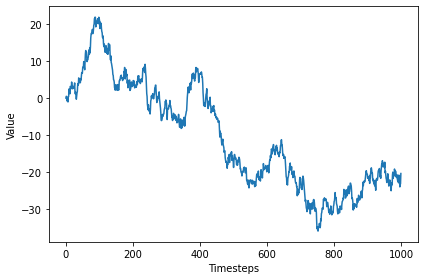

In [ ]:
# Plot your path:

fig, ax = plt.subplots()
ax.plot(random_walk) ;
ax.set_xlabel('Timesteps') ;
ax.set_ylabel('Value') ;
plt.tight_layout() ;

<i>Augmented Dickey Fuller test (ADF Test)</i> is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series. In ARIMA time series forecasting, the first step is to determine the number of differencing required to make the series stationary. ADF test is fundamentally a statistical significance test. A Dickey-Fuller test is a unit root test that tests the null hypothesis that α = 1. Thisimplies that time series is non-stationary. Null Hypothesis (Ho): α (alpha) =1.<br>
For syntax of `adfuller`, refer [here](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)


In [ ]:
# Test if random walk is stationary or not
ADF_result = adfuller(random_walk)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.1257170309578675
p-value: 0.7047080645542082


p-value > 0.05 indicates that test is not significant. Null hypothesis stands and the series is non-stationary.

Auto correlation function or acf is Correlation between time series with a lagged version of itself. The correlation between the observation at the current time spot and the observations at previous time spots.The autocorrelation function starts a lag 0, which is the correlation of the time series with itself and therefore results in a correlation of 1. The ACF plot can provide answers to the following questions:
> Is the observed time series white noise / random?<br>
> Is an observation related to an adjacent observation, an observation twice-removed, and so on?

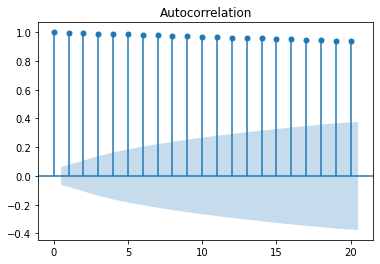

In [ ]:
# ACF of random walk upto 20 lags:
plot_acf(random_walk, lags=20);

In [ ]:
# Let us take first difference and then look at the 
#  differenced series:
diff_random_walk = np.diff(random_walk, n=1)

Text(0.5, 1.0, 'Differenced Random Walk')

Text(0.5, 0, 'Timesteps')

Text(0, 0.5, 'Value')

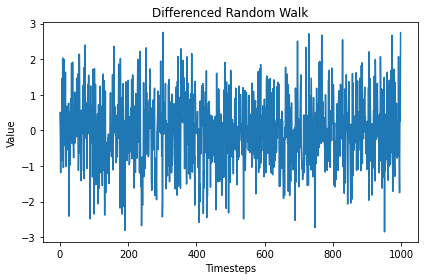

In [ ]:
# Plot of diffrenced series:
plt.plot(diff_random_walk)
plt.title('Differenced Random Walk')
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.tight_layout()

In [ ]:
# ADF test for diffrenced series:

ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -21.647054710293684
p-value: 0.0


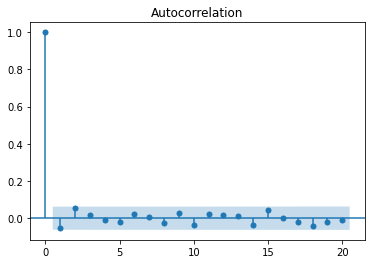

In [ ]:
# ACF plot for differenced series:
plot_acf(diff_random_walk, lags=20);


##  Is GOOGL a random walk?
Are google share prices, a random walk?

In [ ]:
# Read stock prices:
df_g = pd.read_csv( path / "google.csv")

In [ ]:
df_g.shape
df_g.head()

(253, 7)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


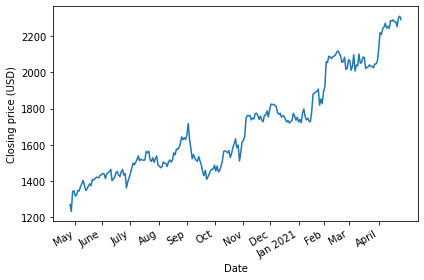

In [ ]:
# Plot the close prices
fig, ax = plt.subplots();
ax.plot(df_g['Date'], df_g['Close']);
ax.set_xlabel('Date');
ax.set_ylabel('Closing price (USD)');

plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235], 
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2021', 'Feb', 'Mar', 'April']);

fig.autofmt_xdate();
plt.tight_layout();

In [ ]:
GOOGL_ADF_result = adfuller(df_g['Close'])

print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')

ADF Statistic: 0.16025048664771302
p-value: 0.9699419435913057


In [ ]:
# Let us take first difference and then look at the 
#  differenced series:
diff_close = np.diff(df_g['Close'].values, n=1)

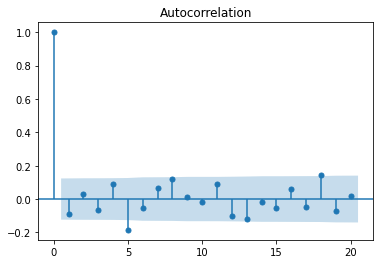

In [ ]:
plot_acf(diff_close, lags=20);


In [ ]:
GOOGL_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {GOOGL_diff_ADF_result[0]}')
print(f'p-value: {GOOGL_diff_ADF_result[1]}')

ADF Statistic: -5.303439704295234
p-value: 5.3865309614545585e-06


## Using the Ljung-Box test

Another test we can use is the Ljung-Box test. This test will check our data for independence. The Ljung-Box test is a statistical test that checks if autocorrelation exists in a time series. This is another hypothesis test with the assumption being that the data is independent, thus stationary. Alternatively, if we get a low p-value, we can reject the null hypothesis and assume the data is non-stationary. Null hypothesis is that data is stationary.

In [12]:
# Read the data:
df = pd.read_csv('https://raw.githubusercontent.com/ourcodingclub/CC-time-series/master/monthly_milk.csv')

,month,milk_prod_per_cow_kg
0,1962-01-01,265.05
1,1962-02-01,252.45
2,1962-03-01,288.00
3,1962-04-01,295.20
4,1962-05-01,327.15


month                    object
milk_prod_per_cow_kg    float64
dtype: object

In [15]:
df.head()
print("\n=======\n")
df.dtypes

,month,milk_prod_per_cow_kg
0,1962-01-01,265.05
1,1962-02-01,252.45
2,1962-03-01,288.00
3,1962-04-01,295.20
4,1962-05-01,327.15


month                    object
milk_prod_per_cow_kg    float64
dtype: object

In [16]:
# Transform month to datetime
df.month = pd.to_datetime(df.month)
df = df.set_index('month')

In [17]:
df.dtypes
print("\n==========\n")
df.head()

milk_prod_per_cow_kg    float64
dtype: object

,milk_prod_per_cow_kg
month,
1962-01-01,265.05
1962-02-01,252.45
1962-03-01,288.00
1962-04-01,295.20
1962-05-01,327.15


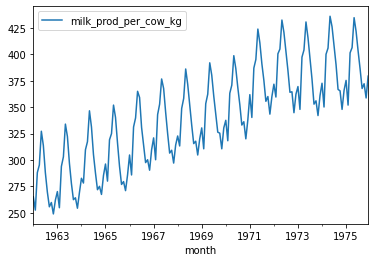

In [18]:
# Plot timeseries
df.plot();

See syntax of ljung-box test [here](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html).<br> There is also a small example at the bottom of this page for residuals. Generaly the test is used to test of autocorrelation in residuals (ie after a model has been fitted). An dhence the module of the test is `statsmodels.stats.diagnostic`

In [19]:
# Perform the ljung-box test:

acorr_ljungbox(df, lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,135.942829,2.053590e-31


### Exercise: Examine if timeseries `widget_sales.csv` is stationary or not?

In [ ]:
############# I am done ###############

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    
    total_len = train_len + horizon
    
    if method == 'mean':
        pred_mean = []
        
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))

        return pred_mean

    elif method == 'last':
        pred_last_value = []
        
        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))
            
        return pred_last_value
    
    elif method == 'MA':
        pred_MA = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(0,0,2))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_MA.extend(oos_pred)
            
        return pred_MA

In [ ]:
pred_df = test.copy()

TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_MA = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'MA')

pred_df['pred_mean'] = pred_mean
pred_df['pred_last_value'] = pred_last_value
pred_df['pred_MA'] = pred_MA

pred_df.head()

,widget_sales_diff,pred_mean,pred_last_value,pred_MA
449,-1.170131,0.034319,-1.803658,-1.078833
450,0.580967,0.034319,-1.803658,-0.273309
451,-0.144902,0.032861,0.580967,0.781223
452,-0.096564,0.032861,0.580967,0.234969
453,-0.372334,0.032183,-0.096564,0.168994


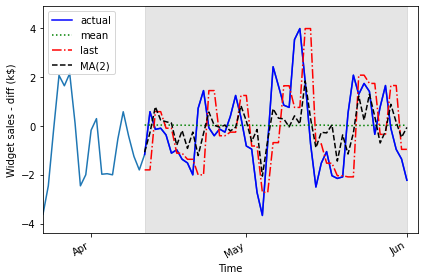

In [ ]:
fig, ax = plt.subplots()

ax.plot(df_diff['widget_sales_diff'])
ax.plot(pred_df['widget_sales_diff'], 'b-', label='actual')
ax.plot(pred_df['pred_mean'], 'g:', label='mean')
ax.plot(pred_df['pred_last_value'], 'r-.', label='last')
ax.plot(pred_df['pred_MA'], 'k--', label='MA(2)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Widget sales - diff (k$)')

ax.axvspan(449, 498, color='#808080', alpha=0.2)

ax.set_xlim(430, 500)

plt.xticks(
    [439, 468, 498], 
    ['Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH04_F08_peixeiro.png', dpi=300)

In [ ]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(pred_df['widget_sales_diff'], pred_df['pred_mean'])
mse_last = mean_squared_error(pred_df['widget_sales_diff'], pred_df['pred_last_value'])
mse_MA = mean_squared_error(pred_df['widget_sales_diff'], pred_df['pred_MA'])

print(mse_mean, mse_last, mse_MA)

2.5606299456880537 3.2494260812249225 1.9481714497703646


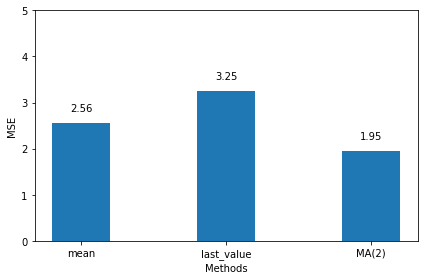

In [ ]:
fig, ax = plt.subplots()

x = ['mean', 'last_value', 'MA(2)']
y = [mse_mean, mse_last, mse_MA]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 5)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.25, s=str(round(value, 2)), ha='center')

plt.tight_layout()

plt.savefig('figures/CH04_F09_peixeiro.png', dpi=300)

In [ ]:
df['pred_widget_sales'] = pd.Series()
df['pred_widget_sales'][450:] = df['widget_sales'].iloc[450] + pred_df['pred_MA'].cumsum()

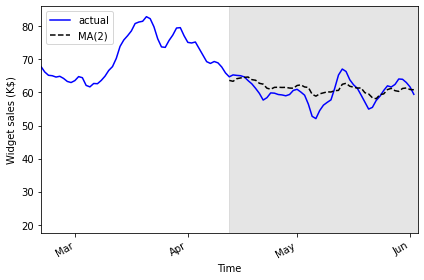

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['widget_sales'], 'b-', label='actual')
ax.plot(df['pred_widget_sales'], 'k--', label='MA(2)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Widget sales (K$)')

ax.axvspan(450, 500, color='#808080', alpha=0.2)

ax.set_xlim(400, 500)

plt.xticks(
    [409, 439, 468, 498], 
    ['Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH04_F11_peixeiro.png', dpi=300)

In [ ]:
from sklearn.metrics import mean_absolute_error

mae_MA_undiff = mean_absolute_error(df['widget_sales'].iloc[450:], df['pred_widget_sales'].iloc[450:])

print(mae_MA_undiff)

2.324470924412907
